In [ ]:
#@title Load the Universal Sentence Encoder's TF Hub module
from absl import logging
import pre
import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [ ]:
layer=0 #Change to 0 or 1 , 0 for layer 1 , 1 for layer 2

In [ ]:
label=pre.create_label(layer)
norm_corpus=pre.norm_corpus
fileid=pre.fileid
message_embeddings = embed(norm_corpus)
new_label=[]
new_embed=[]
new_fileid=[]
new_corpus=[]
length = len(message_embeddings)
for i in range(0, length):
  for j in range(0,len(label[i])):
    new_embed.append(message_embeddings[i])
    new_label.append(label[i][j])
    new_fileid.append(fileid[i])
    new_corpus.append(norm_corpus[i])
df_tfidf=pre.pd.DataFrame(pre.np.round(new_embed, 2))
#df_tfidf.insert(0, "sentences", corpus)
df_tfidf["tag"]=new_label
df_tfidf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,tag
0,-0.06,-0.08,0.07,0.02,-0.06,0.03,0.02,-0.04,-0.05,0.08,-0.04,-0.04,0.00,-0.02,-0.04,-0.07,0.04,0.02,0.06,-0.05,-0.07,0.05,-0.08,0.03,0.08,0.06,0.06,0.01,0.01,0.05,0.05,-0.07,0.01,0.05,0.04,-0.07,0.01,-0.00,-0.05,0.04,...,-0.01,0.05,0.01,-0.07,-0.04,-0.01,-0.07,0.05,-0.00,0.05,-0.04,-0.06,0.05,0.05,0.04,0.03,0.00,-0.00,-0.02,0.02,0.05,0.01,0.05,0.02,0.04,-0.03,-0.04,-0.03,-0.02,-0.06,-0.00,-0.03,-0.04,0.05,0.04,0.03,0.08,0.08,-0.06,SMY
1,0.03,-0.04,0.07,-0.05,-0.03,-0.00,0.07,-0.03,-0.01,0.08,0.07,-0.01,0.04,0.02,-0.02,0.06,0.04,-0.01,-0.07,-0.07,-0.06,0.03,-0.08,0.06,0.07,-0.01,0.04,0.04,-0.01,-0.06,-0.04,-0.01,-0.07,0.05,0.04,-0.06,-0.07,-0.04,-0.00,-0.01,...,0.04,-0.01,-0.07,-0.06,-0.03,0.08,-0.06,0.04,0.02,0.05,-0.05,-0.03,0.08,0.08,-0.01,-0.04,0.03,-0.01,0.06,-0.03,0.04,0.07,0.07,0.04,-0.00,0.00,0.05,0.02,-0.03,-0.01,0.04,0.04,-0.02,0.05,0.07,-0.02,0.07,0.07,-0.04,SMY
2,-0.07,-0.04,-0.05,0.01,0.00,0.02,0.03,-0.02,-0.02,0.08,-0.06,-0.01,-0.02,0.09,0.01,0.05,-0.00,0.05,-0.05,0.05,0.04,0.03,0.00,0.06,0.03,0.04,0.02,0.03,0.01,0.07,0.02,0.05,0.04,-0.01,-0.01,0.03,-0.04,0.01,-0.02,0.06,...,0.06,0.01,-0.02,0.00,0.01,0.06,0.07,-0.03,-0.02,-0.02,-0.01,-0.05,0.01,-0.06,-0.06,-0.08,-0.02,-0.03,0.03,0.02,-0.00,-0.09,-0.04,-0.05,-0.03,0.02,-0.05,-0.06,0.02,0.03,-0.09,-0.05,-0.03,-0.03,-0.01,0.04,0.02,-0.02,0.03,CRT
3,-0.02,0.02,0.08,-0.02,0.02,0.00,-0.01,-0.02,0.03,0.06,-0.05,-0.01,-0.05,0.06,0.08,0.06,0.02,0.01,-0.01,-0.02,-0.02,0.09,-0.03,-0.06,-0.02,0.01,0.06,0.04,-0.08,0.07,0.07,-0.00,0.01,0.04,-0.04,0.02,-0.05,-0.06,0.04,0.06,...,-0.01,-0.07,0.05,0.04,-0.01,0.08,0.05,0.07,0.04,-0.04,0.04,-0.10,0.01,0.09,-0.06,-0.08,-0.02,0.03,-0.05,-0.02,0.06,0.08,-0.00,0.01,-0.06,-0.05,0.00,0.03,0.02,-0.03,0.05,-0.04,0.02,0.02,-0.03,0.01,0.04,-0.00,-0.04,CRT
4,0.07,-0.02,0.03,0.01,0.05,0.02,-0.03,-0.04,0.02,0.08,-0.02,-0.08,0.00,0.01,-0.04,0.07,0.07,-0.05,-0.05,-0.06,-0.05,0.05,-0.08,0.01,0.06,-0.03,-0.06,0.04,-0.04,0.03,-0.04,-0.04,-0.06,-0.01,0.02,-0.02,-0.05,-0.04,-0.00,-0.01,...,0.03,-0.07,0.02,-0.05,-0.02,0.04,0.01,-0.02,-0.02,-0.04,-0.08,-0.06,0.07,-0.05,-0.04,-0.07,-0.00,-0.05,0.02,-0.02,0.01,0.06,0.07,-0.07,-0.00,-0.04,-0.01,0.03,-0.07,-0.01,-0.03,-0.03,-0.07,0.06,0.05,0.04,0.08,0.06,-0.00,DIS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16894,0.06,-0.04,-0.02,-0.04,0.03,-0.05,-0.07,0.04,0.03,0.08,-0.01,0.02,-0.07,0.04,-0.04,-0.08,0.01,-0.03,-0.03,0.01,-0.02,0.01,-0.02,0.03,0.06,0.07,0.07,-0.03,0.02,0.07,0.07,-0.05,0.02,0.02,-0.03,0.07,-0.05,0.00,-0.06,0.04,...,0.05,0.07,-0.04,-0.04,0.05,0.02,-0.06,0.04,0.07,-0.07,-0.03,0.04,-0.02,-0.01,-0.02,0.01,0.01,-0.03,-0.01,0.02,0.04,0.04,0.04,-0.06,0.06,-0.05,-0.06,-0.02,-0.01,-0.01,0.03,-0.07,-0.01,-0.04,0.06,0.04,0.08,0.02,-0.07,SUG
16895,-0.06,-0.04,-0.02,-0.06,0.00,-0.05,0.00,-0.02,0.04,0.09,-0.06,-0.06,-0.05,0.05,0.05,-0.00,0.02,-0.03,-0.07,-0.06,-0.02,0.06,0.02,0.02,0.05,-0.01,0.02,-0.04,0.01,-0.06,0.02,-0.02,-0.05,-0.06,-0.05,-0.01,0.02,0.05,-0.07,0.03,...,-0.00,0.07,-0.03,-0.06,0.05,0.04,-0.07,0.06,0.01,0.07,-0.08,-0.06,0.00,0.03,0.02,-0.01,-0.05,-0.02,0.06,-0.03,0.04,0.06,-0.01,-0.05,0.02,-0.03,-0.00,0.05,0.00,-0.07,-0.05,-0.01,-0.02,-0.01,0.01,0.00,0.08,-0.02,-0.05,APC
16896,-0.00,-0.01,0.02,-0.01,0.03,-0.07,-0.06,-0.05,0.03,-0.02,-0.02,-0.06,0.05,-0.03,0.07,-0.04,-0.00,0.02,-0.05,-0.04,-0.09,0.07,-0.00,0.04,0.03,0.05,-0.00,-0.04,-0.01,0.05,-0.02,-0.05,-0.06,0.01,-0.01,-0.05,-0.07,-0.01,-0.05,0.08,...,0.00,0.06,0.01,-0.01,0.03,0.04,0.03,0

Creating X

In [ ]:
import numpy as np
X_df=df_tfidf[df_tfidf.columns[0:-1]] #X dataframe
X=X_df.to_numpy()    # X in array
y=df_tfidf["tag"]
print(np.unique(df_tfidf["tag"]))
class_names=np.unique(df_tfidf["tag"])

['APC' 'CNT' 'CRT' 'DFT' 'DIS' 'FBK' 'QSN' 'SMY' 'SUG']


SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
from collections import Counter
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.33, shuffle=False)
y_tr=y_tr.reset_index()['tag'].tolist()
print(X_tr.shape)
print(len(y_tr))

(11322, 512)
11322


In [ ]:
X_train=X_tr
y_train=y_tr

In [ ]:
print(X_train.shape)
print(len(y_train))

print(length)
print(y_train)

(11322, 512)
11322
16036
['SMY', 'SMY', 'CRT', 'CRT', 'DIS', 'QSN', 'CRT', 'DIS', 'SMY', 'SMY', 'SMY', 'DIS', 'SMY', 'SMY', 'APC', 'CRT', 'DFT', 'CRT', 'CRT', 'SUG', 'DFT', 'QSN', 'QSN', 'QSN', 'QSN', 'DIS', 'DIS', 'QSN', 'QSN', 'SMY', 'SMY', 'SMY', 'CRT', 'SUG', 'CRT', 'DIS', 'DFT', 'DIS', 'DIS', 'APC', 'SUG', 'FBK', 'DIS', 'QSN', 'QSN', 'QSN', 'QSN', 'QSN', 'DIS', 'APC', 'SUG', 'CRT', 'CRT', 'APC', 'APC', 'SMY', 'DIS', 'SMY', 'APC', 'SMY', 'DFT', 'DIS', 'SMY', 'DIS', 'QSN', 'DIS', 'DFT', 'DFT', 'SUG', 'APC', 'DFT', 'DFT', 'SUG', 'SUG', 'QSN', 'SUG', 'FBK', 'APC', 'SUG', 'DIS', 'SMY', 'SMY', 'DIS', 'SMY', 'DIS', 'APC', 'DIS', 'QSN', 'SMY', 'APC', 'SMY', 'DFT', 'DFT', 'CRT', 'SUG', 'DFT', 'CRT', 'QSN', 'QSN', 'DFT', 'CRT', 'CRT', 'SMY', 'DFT', 'SUG', 'DFT', 'DFT', 'SMY', 'SMY', 'APC', 'CRT', 'QSN', 'SUG', 'QSN', 'QSN', 'SUG', 'DIS', 'APC', 'DIS', 'SUG', 'SUG', 'DIS', 'QSN', 'APC', 'SUG', 'QSN', 'QSN', 'SUG', 'APC', 'DIS', 'DIS', 'APC', 'DIS', 'CRT', 'DIS', 'SUG', 'SMY', 'APC', 'APC', '

LOGISTIC

In [ ]:

import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
logmodel = LogisticRegression(class_weight='balanced',solver='liblinear')
logmodel.fit(X_train,y_train)
y_pred = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

         APC       0.49      0.50      0.49       818
         CNT       0.02      0.10      0.03        10
         CRT       0.43      0.33      0.37      1115
         DFT       0.21      0.12      0.15       514
         DIS       0.26      0.14      0.18       919
         FBK       0.22      0.60      0.33        96
         QSN       0.35      0.47      0.40       555
         SMY       0.50      0.59      0.54      1108
         SUG       0.27      0.44      0.34       442

    accuracy                           0.38      5577
   macro avg       0.31      0.37      0.32      5577
weighted avg       0.38      0.38      0.37      5577

Accuracy: 0.38353953738569124


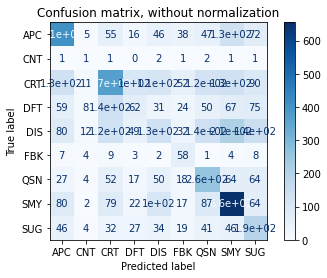

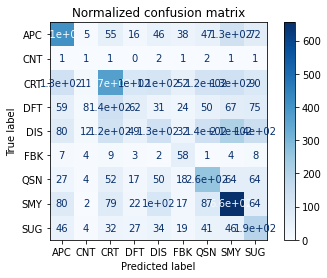

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logmodel, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

In [ ]:
import pandas as pd
index=y_test.keys()
x=[]
y=[]
z=[]
for i in index:
  x.append(new_corpus[i])
  y.append(new_label[i])
  z.append(y_pred[i-index[0]])

df = pd.DataFrame(list(zip(x,y,z)),columns =['Sentence', 'Actual_label','Predicted_label'])
df.to_excel("UNIVERSAL_LOGISTIC.xlsx")

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
clf = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt',class_weight='balanced_subsample')

import sklearn.metrics as metrics
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

SVM

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
# Make a decision tree and train
clf = svm.SVC(class_weight='balanced',decision_function_shape='ovo')
import sklearn.metrics as metrics
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

SGD

In [ ]:

from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()